In [83]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [84]:
df=pd.read_csv("HR_comma_sep.csv")

In [85]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.10,0.77,6,247,4,0,1,0,sales,low
3,0.92,0.85,5,259,5,0,1,0,sales,low
4,0.89,1.00,5,224,5,0,1,0,sales,low


In [86]:
dum_df=pd.get_dummies(df,drop_first=True)
print(dum_df.columns)

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department_RandD', 'Department_accounting',
       'Department_hr', 'Department_management', 'Department_marketing',
       'Department_product_mng', 'Department_sales', 'Department_support',
       'Department_technical', 'salary_low', 'salary_medium'],
      dtype='object')


In [87]:
dum_df.info()
dum_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14995 entries, 0 to 14994
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      14995 non-null  float64
 1   last_evaluation         14995 non-null  float64
 2   number_project          14995 non-null  int64  
 3   average_montly_hours    14995 non-null  int64  
 4   time_spend_company      14995 non-null  int64  
 5   Work_accident           14995 non-null  int64  
 6   left                    14995 non-null  int64  
 7   promotion_last_5years   14995 non-null  int64  
 8   Department_RandD        14995 non-null  bool   
 9   Department_accounting   14995 non-null  bool   
 10  Department_hr           14995 non-null  bool   
 11  Department_management   14995 non-null  bool   
 12  Department_marketing    14995 non-null  bool   
 13  Department_product_mng  14995 non-null  bool   
 14  Department_sales        14995 non-null

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.10,0.77,6,247,4,0,1,0,False,False,False,False,False,False,True,False,False,True,False
3,0.92,0.85,5,259,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.89,1.00,5,224,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False


In [88]:
x=dum_df.drop("left",axis=1)
y=dum_df["left"]

In [89]:
lr=LogisticRegression(penalty="l2")
lr.fit(xtrain,ytrain)
print(lr.intercept_,lr.coef_)
y_pred_prob=lr.predict_proba(xtest)
y_pred_prob

[-0.75580855] [[-4.30890679  0.41489168 -0.30738432  0.00441474  0.24006802 -1.6050681
  -0.94959118 -0.5501382   0.13489755  0.18321391 -0.50498178  0.10195035
   0.05198798 -0.02463594  0.02381187  0.09008931  1.56624184  1.03300818]]


array([[0.82752307, 0.17247693],
       [0.91740631, 0.08259369],
       [0.84087735, 0.15912265],
       ...,
       [0.84535654, 0.15464346],
       [0.65636494, 0.34363506],
       [0.97413812, 0.02586188]])

In [90]:
fpr,tpr,tres=roc_curve(ytest,y_pred_prob[:,1])

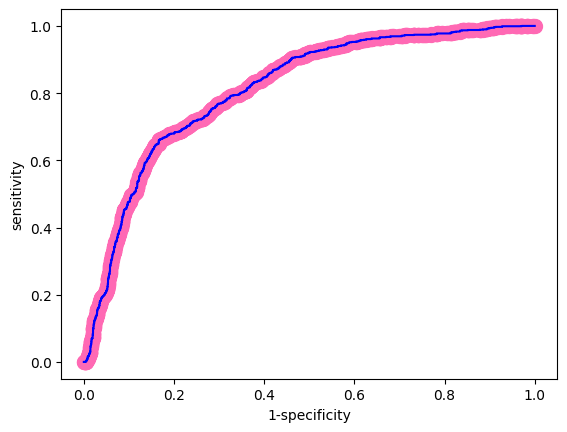

In [91]:
plt.scatter(fpr,tpr,c="hotpink",s=100)
plt.plot(fpr,tpr,c="blue")
plt.xlabel("1-specificity")
plt.ylabel("sensitivity")
plt.show()

In [92]:
#find area under curve
print(roc_auc_score(ytest,y_pred_prob[:,1]))

0.8113256092209659


In [93]:
from sklearn.metrics import log_loss
print(log_loss(ytest,y_pred_prob[:,1]))

0.4358701426947877


In [94]:

results=cross_val_score(lr,x,y,cv=kfold,scoring="neg_log_loss")
print(results.mean())

-0.4315511106478677


In [95]:
import warnings
warnings.filterwarnings("ignore")

# use grid search cv trying different solvers and penalty

In [97]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

params= {
    'penalty': ['l2',None], "C":np.linspace(0.001,10,20), # Try both L1 and L2 penalties
    'solver': ['lbfgs', 'newton-cg','newton-cholesky',"sag"]}
lr=LogisticRegression()
kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=24)
gcv=GridSearchCV(lr,param_grid=params,cv=kfold,scoring="neg_log_loss")
gcv.fit(x,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 1.5797894736842104, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.42982330544447384


In [99]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold 

params = {
    'penalty': ['l2','None'],'C':np.linspace(0.001,10,20),  # Try both L1 (Lasso) and L2 (Ridge) penalties
    'solver': ['lbfgs', 'sag','newton-cg', 'newton-cholesky']  # Different solvers
}

lr = LogisticRegression()
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)
gcv_r= GridSearchCV(lr,param_grid=params ,scoring='neg_log_loss',cv=kfold)
gcv_r.fit(x,y)

print(gcv_r.best_params_)
print(gcv_r.best_score_)


{'C': 1.5797894736842104, 'penalty': 'l2', 'solver': 'newton-cg'}
-0.42982330544447384
